In [107]:
df = pd.read_csv("/Users/vaishnaviiparamashivam/Downloads/us_accidents_new.csv")


In [94]:
df.columns


Index([u'ID', u'Source', u'TMC', u'Severity', u'Start_Time', u'End_Time',
       u'Start_Lat', u'Start_Lng', u'End_Lat', u'End_Lng', u'Distance(mi)',
       u'Description', u'Number', u'Street', u'Side', u'City', u'County',
       u'State', u'Zipcode', u'Country', u'Timezone', u'Airport_Code',
       u'Weather_Timestamp', u'Temperature(F)', u'Wind_Chill(F)',
       u'Humidity(%)', u'Pressure(in)', u'Visibility(mi)', u'Wind_Direction',
       u'Wind_Speed(mph)', u'Precipitation(in)', u'Weather_Condition',
       u'Amenity', u'Bump', u'Crossing', u'Give_Way', u'Junction', u'No_Exit',
       u'Railway', u'Roundabout', u'Station', u'Stop', u'Traffic_Calming',
       u'Traffic_Signal', u'Turning_Loop', u'Sunrise_Sunset',
       u'Civil_Twilight', u'Nautical_Twilight', u'Astronomical_Twilight',
       u'Start_Year', u'Start_Month', u'Start_Day', u'Start_Hour',
       u'Start_Weekday', u'Time_Duration'],
      dtype='object')

In [106]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html




import matplotlib.ticker as ticker


%matplotlib inline


In [108]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc



In [109]:
df_na= df.drop(['End_Lat', 'End_Lng','Number','Wind_Chill(F)','Precipitation(in)','Description','Street','ID', 'Source','Start_Time','End_Time','City','County','Timezone', 'Airport_Code',
       'Weather_Timestamp','Zipcode','Country'],axis =1)

df_nona=df_na.dropna(axis=0)

In [19]:
df_nona.isna().sum()

TMC                      0
Severity                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Side                     0
State                    0
Country                  0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Start_Year               0
Start_Month              0
Start_Day                0
Start_Hour               0
Start_Weekday            0
T

In [111]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df_nona['Side']= le.fit_transform(df_nona['Side']) 
#df_nona['City']= le.fit_transform(df_nona['City'])
#df_nona['County']= le.fit_transform(df_nona['County'])
df_nona['State']= le.fit_transform(df_nona['State'])
#df_nona['Zipcode']= le.fit_transform(df_nona['Zipcode'])
#df_nona['Country']= le.fit_transform(df_nona['Country'])
#df_nona['Timezone']= le.fit_transform(df_nona['Timezone'])
#df_nona['Airport_Code']= le.fit_transform(df_nona['Airport_Code'])
df_nona['Wind_Direction']= le.fit_transform(df_nona['Wind_Direction'])
df_nona['Civil_Twilight']= le.fit_transform(df_nona['Civil_Twilight'])
df_nona['Sunrise_Sunset']= le.fit_transform(df_nona['Sunrise_Sunset'])
df_nona['Weather_Condition']= le.fit_transform(df_nona['Weather_Condition'])
df_nona['Nautical_Twilight']= le.fit_transform(df_nona['Nautical_Twilight'])
df_nona['Astronomical_Twilight']= le.fit_transform(df_nona['Astronomical_Twilight'])
df_nona['Start_Month']= le.fit_transform(df_nona['Start_Month'])
df_nona['Start_Weekday']= le.fit_transform(df_nona['Start_Weekday'])
#df_nona['Start_Time']= le.fit_transform(df_nona['Start_Time'])
#df_nona['End_Time']= le.fit_transform(df_nona['End_Time'])
#df_nona['Weather_Timestamp']= le.fit_transform(df_nona['Weather_Timestamp'])
df_nona['TMC']= le.fit_transform(df_nona['TMC'])


/Users/vaishnaviiparamashivam/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/vaishnaviiparamashivam/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/vaishnaviiparamashivam/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [112]:
fscore_lst=[]

In [113]:
df=df_nona

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
df[target]=df[target].astype('category')
y=df[target]
y=y.cat.codes
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

/Users/vaishnaviiparamashivam/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [114]:
# Binarizing labels and Training - KNN 
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y = label_binarize(y, classes=[0,1,2,3])
n_classes = y.shape[1]
xcl_train,xcl_test,ycl_train,ycl_test=train_test_split(X,y,test_size=0.3)
finalKNN=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=6))
finalKNN.fit(xcl_train,ycl_train)

#Model prediction
pr_train=finalKNN.predict(xcl_train)
pr=finalKNN.predict(xcl_test)
y_score_train=finalKNN.predict_proba(xcl_train)
y_score=finalKNN.predict_proba(xcl_test)

f1_train=metrics.f1_score(pr_train,ycl_train,average="weighted")
print('Weighted Training F1-Score - KNN: {0:0.2f}'.format(f1_train))
f1_test=metrics.f1_score(pr,ycl_test,average="weighted")
print('Weighted Test F1-Score - KNN: {0:0.2f}'.format(f1_test))
f1knn=f1_test
fscore_lst.append(f1knn)
precision_train=metrics.precision_score(pr_train,ycl_train,average="weighted")
print('Weighted Training Precision - KNN: {0:0.2f}'.format(precision_train))
precision_test=metrics.precision_score(pr,ycl_test,average="weighted")
print('Weighted Test Precision - KNN: {0:0.2f}'.format(precision_test))
recall_train=metrics.recall_score(pr_train,ycl_train,average="weighted")
print('Weighted Training Recall - KNN: {0:0.2f}'.format(recall_train))
recall_test=metrics.recall_score(pr,ycl_test,average="weighted")
print('Weighted Test Recall - KNN: {0:0.2f}'.format(recall_test))


Weighted Training F1-Score - KNN: 0.76
Weighted Test F1-Score - KNN: 0.67
Weighted Training Precision - KNN: 0.75
Weighted Test Precision - KNN: 0.67
Weighted Training Recall - KNN: 0.80
Weighted Test Recall - KNN: 0.69


Average precision score, weighted-averaged over all classes: 0.62


Text(0.5,1,'Average precision score, weighted-averaged over all classes: AP=0.62')

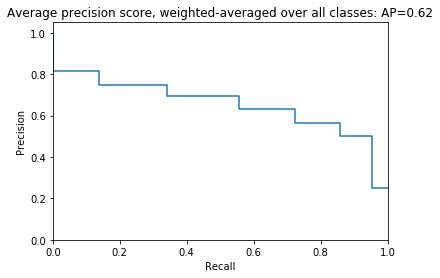

In [69]:
# For each class PR calculation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
for i in range(4):
    precision[i], recall[i] ,_= precision_recall_curve(ycl_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(ycl_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["weighted"], recall["weighted"], _ = precision_recall_curve(ycl_test.ravel(),
    y_score.ravel())
average_precision["weighted"] = average_precision_score(ycl_test, y_score,average="weighted")
print('Average precision score, weighted-averaged over all classes: {0:0.2f}'
      .format(average_precision["weighted"]))
# Plot the micro-averaged Precision-Recall curve
# ...............................................
#
plt.figure()
plt.step(recall['weighted'], precision['weighted'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, weighted-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["weighted"]))

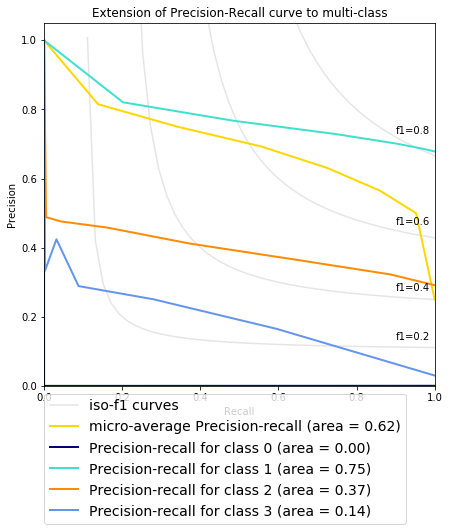

In [70]:
# Plot Precision-Recall curve for each class and iso-f1 curves
# .............................................................
#
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    X = np.linspace(0.01, 1)
    Y = f_score * X / (2 * X - f_score)
    l, = plt.plot(X[Y >= 0], Y[Y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, Y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["weighted"], precision["weighted"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["weighted"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [ ]:
#################3                  LOGISTIC REGRESSION           #####################################

In [115]:
df=df_nona

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
df[target]=df[target].astype('category')
y=df[target]
y=y.cat.codes
X = df.drop(target, axis=1)


/Users/vaishnaviiparamashivam/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [116]:
# Binarizing labels and Training - Logistic regression 
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y = label_binarize(y, classes=[0,1,2,3])
n_classes = y.shape[1]
xcl_train,xcl_test,ycl_train,ycl_test=train_test_split(X,y,test_size=0.3)
finallogreg=OneVsRestClassifier(LogisticRegression(random_state=0))
finallogreg.fit(xcl_train,ycl_train)

#Model prediction
pr_train=finallogreg.predict(xcl_train)
pr=finallogreg.predict(xcl_test)
y_score_train=finallogreg.predict_proba(xcl_train)
y_score=finallogreg.predict_proba(xcl_test)

f1_train=metrics.f1_score(pr_train,ycl_train,average="weighted")
print('Weighted Training F1-Score - Logistic regression: {0:0.2f}'.format(f1_train))
f1_test=metrics.f1_score(pr,ycl_test,average="weighted")
print('Weighted Test F1-Score - Logistic regression: {0:0.2f}'.format(f1_test))
f1log=f1_test
fscore_lst.append(f1log)
precision_train=metrics.precision_score(pr_train,ycl_train,average="weighted")
print('Weighted Training Precision - Logistic regression: {0:0.2f}'.format(precision_train))
precision_test=metrics.precision_score(pr,ycl_test,average="weighted")
print('Weighted Test Precision - Logistic regression: {0:0.2f}'.format(precision_test))
recall_train=metrics.recall_score(pr_train,ycl_train,average="weighted")
print('Weighted Training Recall - Logistic regression: {0:0.2f}'.format(recall_train))
recall_test=metrics.recall_score(pr,ycl_test,average="weighted")
print('Weighted Test Recall - Logistic regression: {0:0.2f}'.format(recall_test))


Weighted Training F1-Score - Logistic regression: 0.74
Weighted Test F1-Score - Logistic regression: 0.74
Weighted Training Precision - Logistic regression: 0.84
Weighted Test Precision - Logistic regression: 0.83
Weighted Training Recall - Logistic regression: 0.69
Weighted Test Recall - Logistic regression: 0.69


Average precision score, weighted-averaged over all classes: 0.73


Text(0.5,1,'Average precision score, weighted-averaged over all classes: AP=0.73')

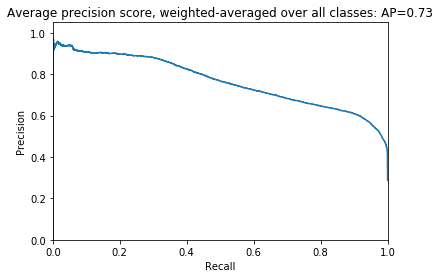

In [74]:
# For each class PR calculation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
for i in range(4):
    precision[i], recall[i] ,_= precision_recall_curve(ycl_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(ycl_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["weighted"], recall["weighted"], _ = precision_recall_curve(ycl_test.ravel(),
    y_score.ravel())
average_precision["weighted"] = average_precision_score(ycl_test, y_score,average="weighted")
print('Average precision score, weighted-averaged over all classes: {0:0.2f}'
      .format(average_precision["weighted"]))
# Plot the micro-averaged Precision-Recall curve
# ...............................................
#
plt.figure()
plt.step(recall['weighted'], precision['weighted'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, weighted-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["weighted"]))

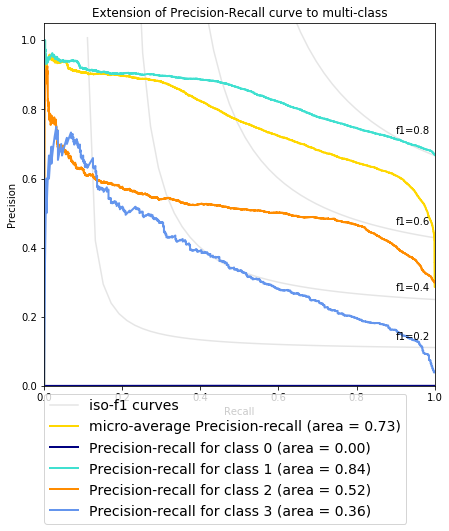

In [75]:
# Plot Precision-Recall curve for each class and iso-f1 curves
# .............................................................
#
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    X = np.linspace(0.01, 1)
    Y = f_score * X / (2 * X - f_score)
    l, = plt.plot(X[Y >= 0], Y[Y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, Y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["weighted"], precision["weighted"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["weighted"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [ ]:
####################################    DECISION TREE   ##############################################

In [117]:
df=df_nona

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
df[target]=df[target].astype('category')
y=df[target]
y=y.cat.codes
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

/Users/vaishnaviiparamashivam/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [118]:
# Binarizing labels and Training - Decision Tree
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y = label_binarize(y, classes=[0,1,2,3])
n_classes = y.shape[1]
xcl_train,xcl_test,ycl_train,ycl_test=train_test_split(X,y,test_size=0.3)
finalDT=OneVsRestClassifier(DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=1))
finalDT.fit(xcl_train,ycl_train)

#Model prediction
pr_train=finalDT.predict(xcl_train)
pr=finalDT.predict(xcl_test)
y_score_train=finalDT.predict_proba(xcl_train)
y_score=finalDT.predict_proba(xcl_test)

f1_dt_train=metrics.f1_score(pr_train,ycl_train,average="weighted")
print('Weighted Training F1-Score - Decision Tree: {0:0.2f}'.format(f1_dt_train))
f1_dt_test=metrics.f1_score(pr,ycl_test,average="weighted")
print('Weighted Test F1-Score - Decision Tree: {0:0.2f}'.format(f1_dt_test))
f1log=f1_dt_test
fscore_lst.append(f1log)
precision_train=metrics.precision_score(pr_train,ycl_train,average="weighted")
print('Weighted Training Precision - Decision Tree: {0:0.2f}'.format(precision_train))
precision_test=metrics.precision_score(pr,ycl_test,average="weighted")
print('Weighted Test Precision - Decision Tree: {0:0.2f}'.format(precision_test))
recall_train=metrics.recall_score(pr_train,ycl_train,average="weighted")
print('Weighted Training Recall - Decision Tree: {0:0.2f}'.format(recall_train))
recall_test=metrics.recall_score(pr,ycl_test,average="weighted")
print('Weighted Test Recall - Decision Tree: {0:0.2f}'.format(recall_test))




Weighted Training F1-Score - Decision Tree: 0.75
Weighted Test F1-Score - Decision Tree: 0.75
Weighted Training Precision - Decision Tree: 0.84
Weighted Test Precision - Decision Tree: 0.83
Weighted Training Recall - Decision Tree: 0.71
Weighted Test Recall - Decision Tree: 0.70


In [41]:
y_score

array([[0.        , 0.        , 0.56944337, 0.4164052 ],
       [0.        , 0.        , 0.31673531, 0.67540247],
       [0.        , 0.        , 0.65103493, 0.15589017],
       ...,
       [0.        , 0.        , 0.31673531, 0.67540247],
       [0.        , 0.        , 0.56944337, 0.4164052 ],
       [0.        , 0.        , 0.75510204, 0.10526316]])

In [56]:
# For each class PR calculation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
for i in range(4):
    precision[i], recall[i] ,_= precision_recall_curve(ycl_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(ycl_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["weighted"], recall["weighted"], _ = precision_recall_curve(ycl_test.ravel(),
    y_score.ravel())
average_precision["weighted"] = average_precision_score(ycl_test, y_score,average="weighted")
print('Average precision score, weighted-averaged over all classes: {0:0.2f}'
      .format(average_precision["weighted"]))


Average precision score, micro-averaged over all classes: 0.74


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.74')

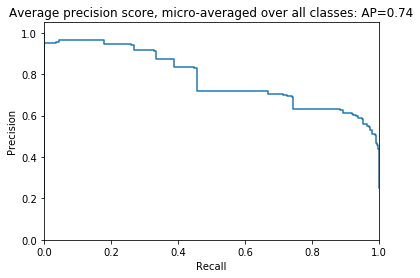

In [57]:
# Plot the micro-averaged Precision-Recall curve
# ...............................................
#
plt.figure()
plt.step(recall['weighted'], precision['weighted'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, weighted-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["weighted"]))


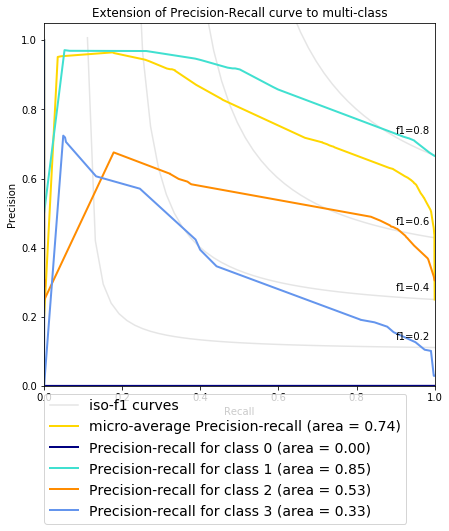

In [58]:
# Plot Precision-Recall curve for each class and iso-f1 curves
# .............................................................
#
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    X = np.linspace(0.01, 1)
    Y = f_score * X / (2 * X - f_score)
    l, = plt.plot(X[Y >= 0], Y[Y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, Y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["weighted"], precision["weighted"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["weighted"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [ ]:
######################################        SVM      #################################################

In [119]:
df=df_nona

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
df[target]=df[target].astype('category')
y=df[target]
y=y.cat.codes
X = df.drop(target, axis=1)


/Users/vaishnaviiparamashivam/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [120]:
# Binarizing labels and Training - SVM
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y = label_binarize(y, classes=[0,1,2,3])
n_classes = y.shape[1]
xcl_train,xcl_test,ycl_train,ycl_test=train_test_split(X,y,test_size=0.3)
finalsvm=OneVsRestClassifier(SVC(C=1000,kernel='rbf',gamma=1e-8))
finalsvm.fit(xcl_train,ycl_train)
#Model prediction
pr_train=finalsvm.predict(xcl_train)
pr=finalsvm.predict(xcl_test)
y_score_train=finalsvm.decision_function(xcl_train)
y_score=finalsvm.decision_function(xcl_test)

f1_train=metrics.f1_score(pr_train,ycl_train,average="weighted")
print('Weighted Training F1-Score - SVM: {0:0.2f}'.format(f1_train))
f1_test=metrics.f1_score(pr,ycl_test,average="weighted")
print('Weighted Test F1-Score - SVM: {0:0.2f}'.format(f1_test))
f1svm=f1_test
fscore_lst.append(f1svm)
precision_train=metrics.precision_score(pr_train,ycl_train,average="weighted")
print('Weighted Training Precision - SVM: {0:0.2f}'.format(precision_train))
precision_test=metrics.precision_score(pr,ycl_test,average="weighted")
print('Weighted Test Precision - SVM: {0:0.2f}'.format(precision_test))
recall_train=metrics.recall_score(pr_train,ycl_train,average="weighted")
print('Weighted Training Recall - SVM: {0:0.2f}'.format(recall_train))
recall_test=metrics.recall_score(pr,ycl_test,average="weighted")
print('Weighted Test Recall - SVM: {0:0.2f}'.format(recall_test))


Weighted Training F1-Score - SVM: 0.80
Weighted Test F1-Score - SVM: 0.81
Weighted Training Precision - SVM: 1.00
Weighted Test Precision - SVM: 1.00
Weighted Training Recall - SVM: 0.67
Weighted Test Recall - SVM: 0.67


Average precision score, weighted-averaged over all classes: 0.71


Text(0.5,1,'Average precision score, weighted-averaged over all classes: AP=0.71')

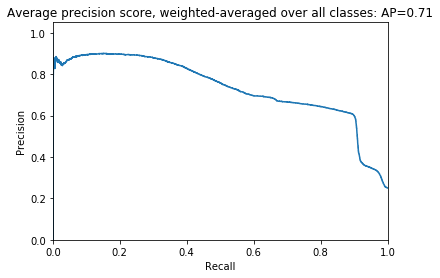

In [82]:
# For each class PR calculation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
for i in range(4):
    precision[i], recall[i] ,_= precision_recall_curve(ycl_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(ycl_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["weighted"], recall["weighted"], _ = precision_recall_curve(ycl_test.ravel(),
    y_score.ravel())
average_precision["weighted"] = average_precision_score(ycl_test, y_score,average="weighted")
print('Average precision score, weighted-averaged over all classes: {0:0.2f}'
      .format(average_precision["weighted"]))
# Plot the micro-averaged Precision-Recall curve
# ...............................................
#
plt.figure()
plt.step(recall['weighted'], precision['weighted'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, weighted-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["weighted"]))

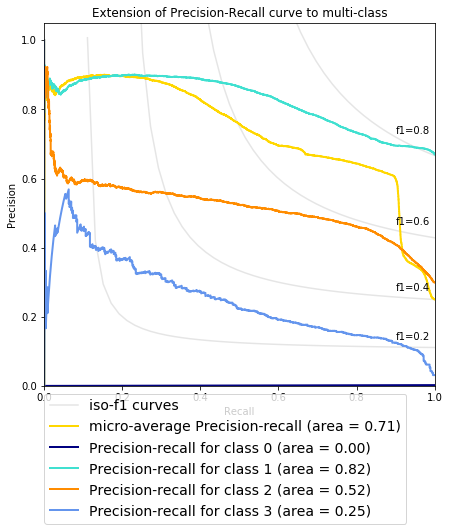

In [83]:
# Plot Precision-Recall curve for each class and iso-f1 curves
# .............................................................
#
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    X = np.linspace(0.01, 1)
    Y = f_score * X / (2 * X - f_score)
    l, = plt.plot(X[Y >= 0], Y[Y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, Y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["weighted"], precision["weighted"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["weighted"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [ ]:
############################ IMPORTANT VARIABLES USING RANDOM FOREST ###########################

Feature ranking:
1. feature 2 (0.069193)
2. feature 0 (0.067118)
3. feature 1 (0.062554)
4. feature 4 (0.055922)
5. feature 9 (0.050154)
6. feature 7 (0.049290)
7. feature 34 (0.049082)
8. feature 8 (0.048892)
9. feature 36 (0.047891)
10. feature 33 (0.047746)
11. feature 3 (0.045788)
12. feature 11 (0.045405)
13. feature 5 (0.045230)
14. feature 12 (0.045225)
15. feature 32 (0.044019)
16. feature 35 (0.042406)
17. feature 13 (0.038429)
18. feature 25 (0.034674)
19. feature 31 (0.032279)
20. feature 10 (0.024674)
21. feature 16 (0.011217)
22. feature 18 (0.010401)
23. feature 27 (0.007441)
24. feature 28 (0.004863)
25. feature 30 (0.004304)
26. feature 23 (0.003909)
27. feature 29 (0.003859)
28. feature 22 (0.003176)
29. feature 14 (0.002114)
30. feature 20 (0.001398)
31. feature 17 (0.000751)
32. feature 19 (0.000359)
33. feature 24 (0.000154)
34. feature 15 (0.000080)
35. feature 21 (0.000004)
36. feature 26 (0.000000)
37. feature 6 (0.000000)


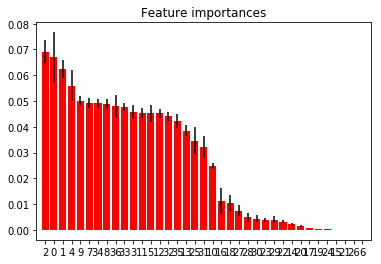

In [87]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [121]:
algo_lst=[ 'K-Nearest Neighbors','Logistic Regression','Decision Tree','SVM']

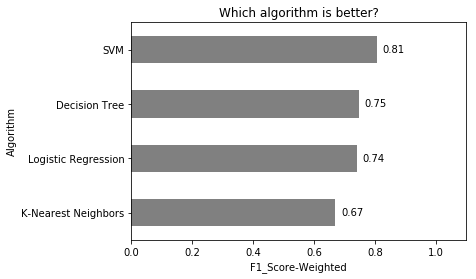

In [122]:
# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, fscore_lst)), columns=['Algorithm','F1_Score']).sort_values(by=['F1_Score'],ascending = True)


# Make a plot
ax=df_acc.plot.barh('Algorithm', 'F1_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('F1_Score-Weighted')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Which algorithm is better?')

plt.show()